# makemore

https://www.youtube.com/watch?v=PaCmpygFfXo


In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

In [8]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [3]:
import torch

In [128]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [129]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [130]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [14]:
import matplotlib.pyplot as plt

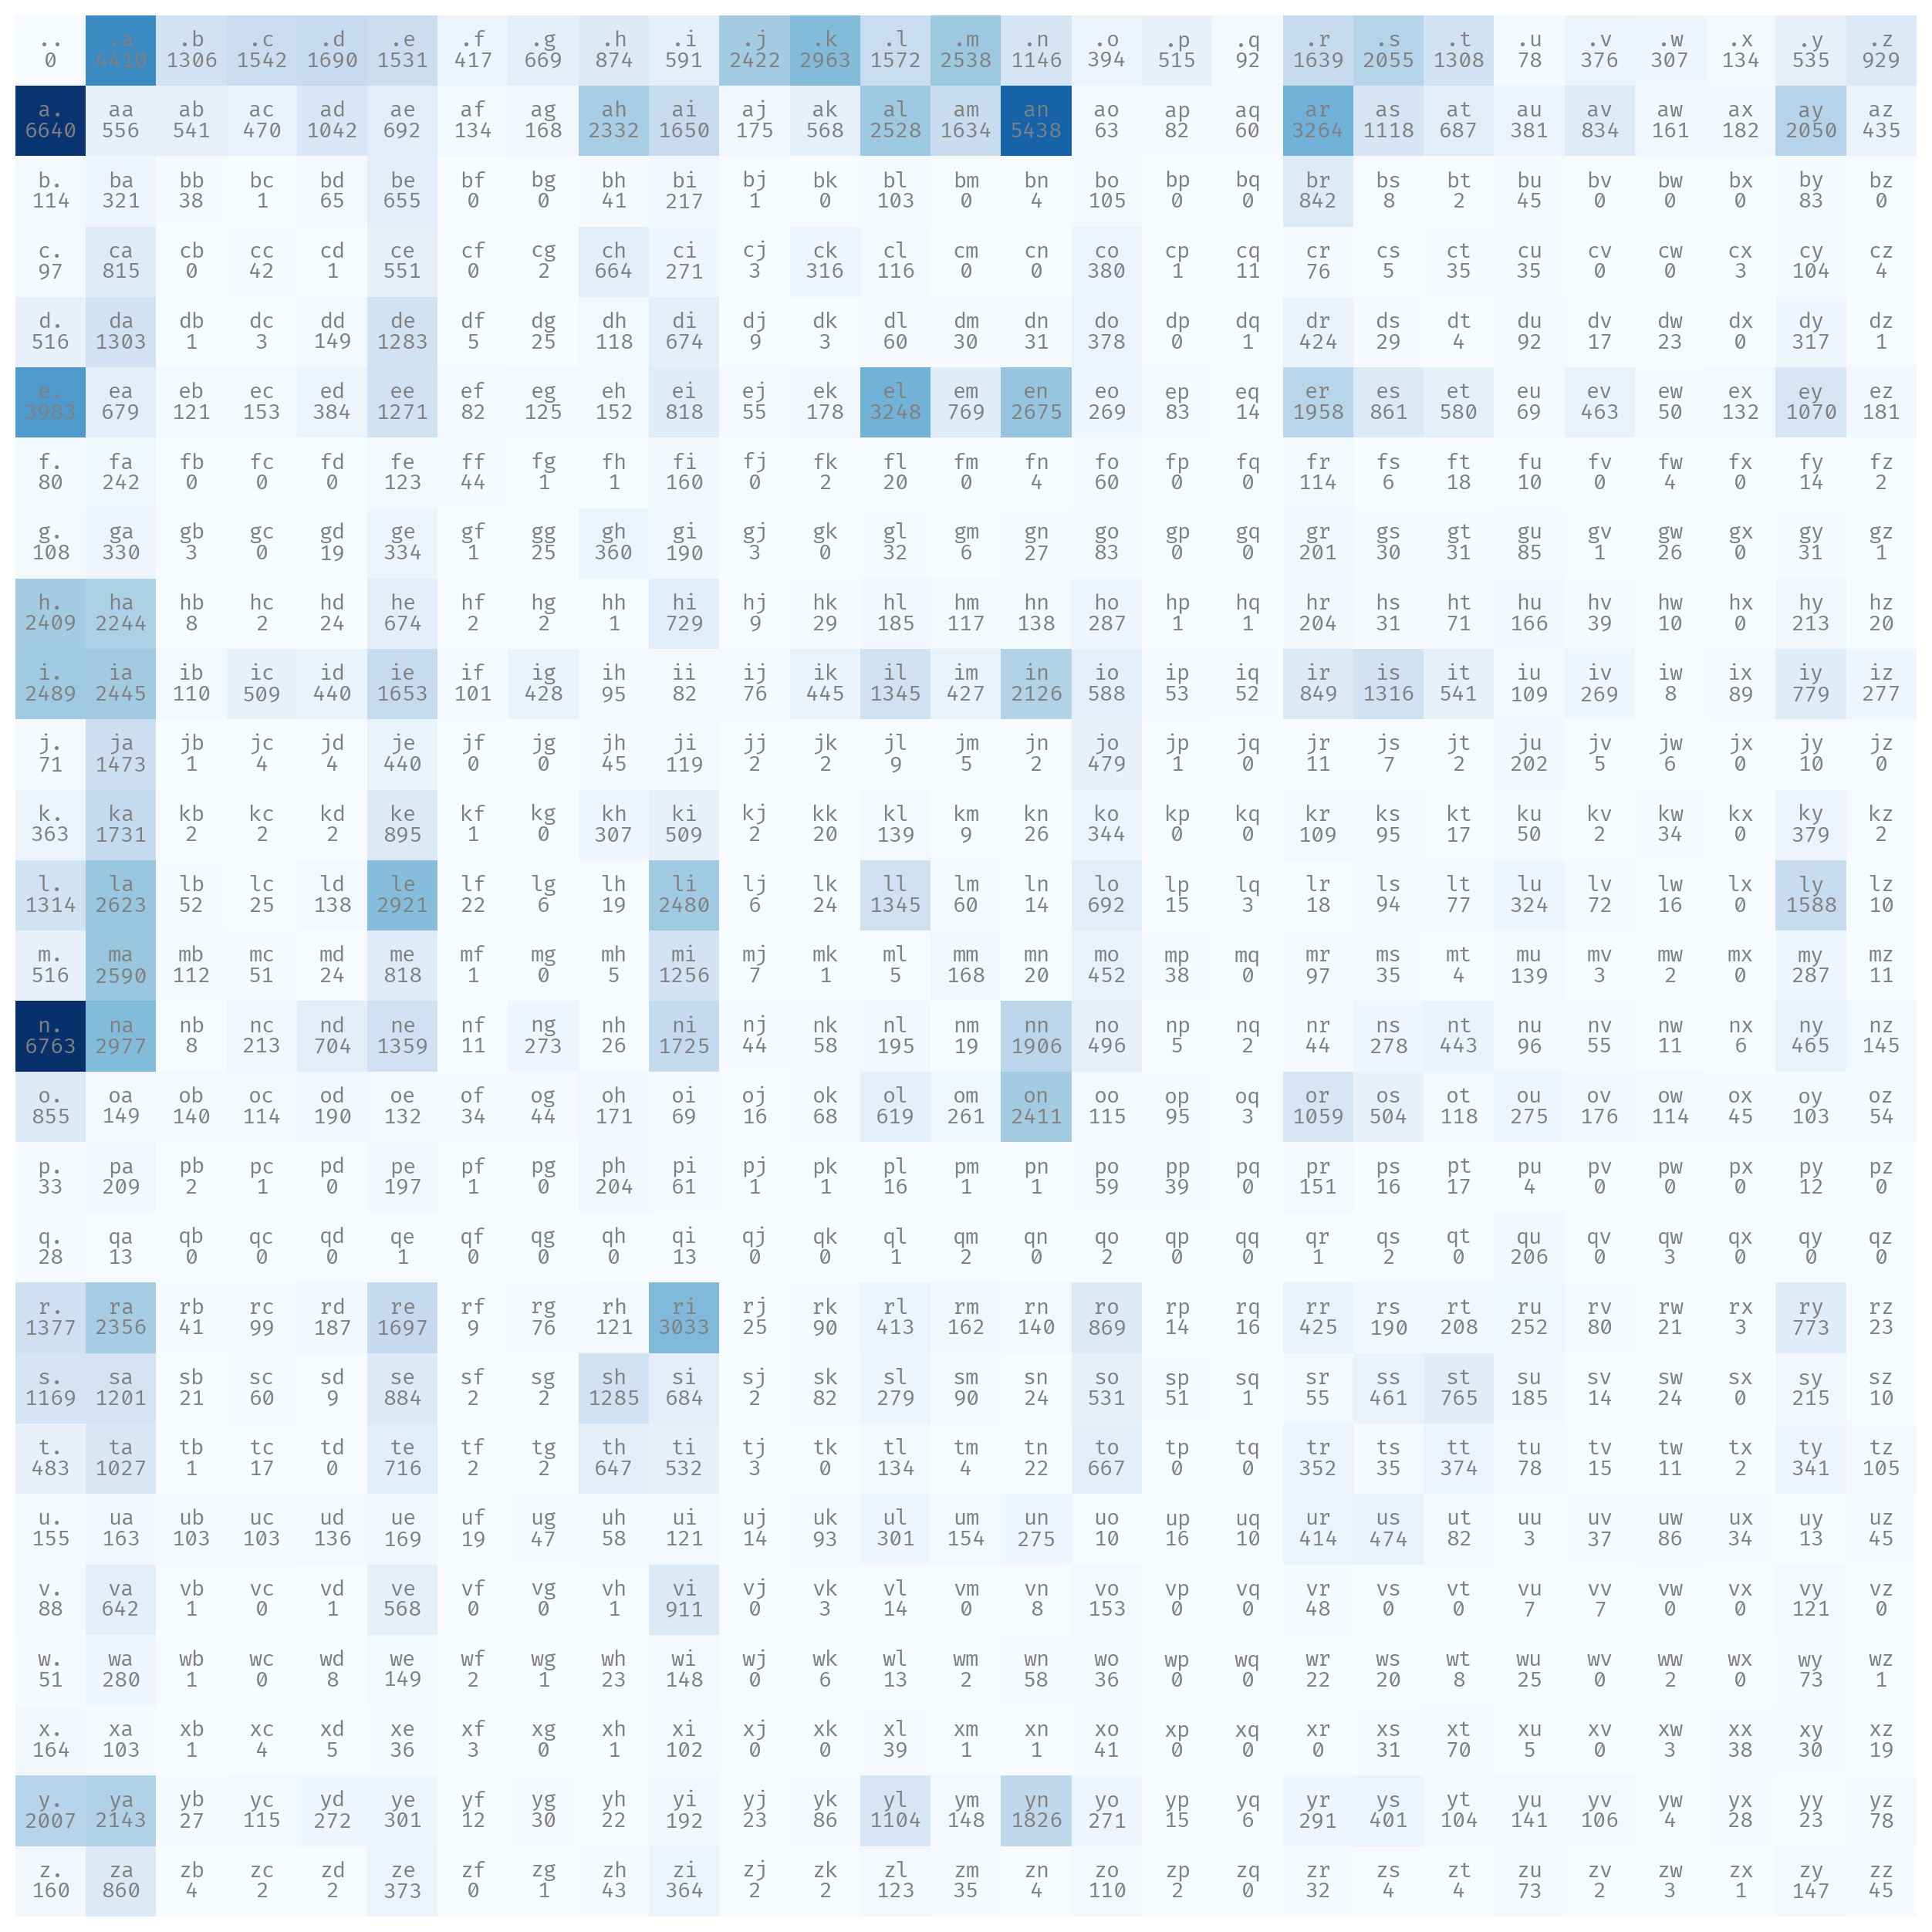

In [15]:
# plt.imshow(N)
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [19]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [21]:
p.shape

torch.Size([3])

In [24]:
P.shape

torch.Size([27, 27])

In [25]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [26]:
# 27, 27
# 27,  1

In [27]:
P.sum(1).shape

torch.Size([27])

In [28]:
# 27, 27
#  1,  27

In [131]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [29]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [30]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [31]:
log_likelihood = 0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [32]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [33]:
xs

tensor([ 0,  5, 13, 13,  1])

In [34]:
ys

tensor([ 5, 13, 13,  1,  0])

In [35]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
import torch.nn.functional as F

In [36]:
xenc.shape

torch.Size([5, 27])

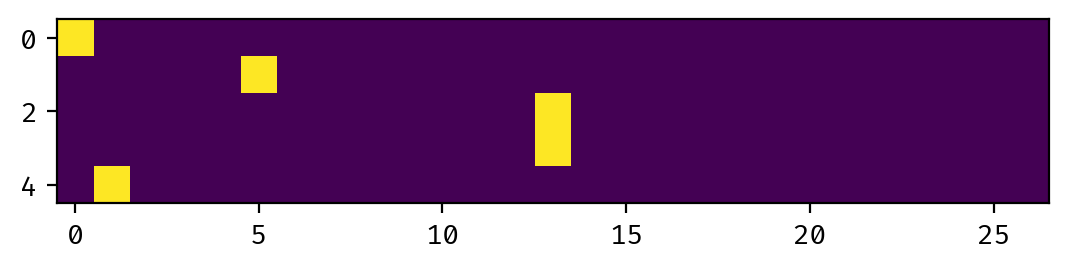

In [37]:
plt.imshow(xenc)

In [38]:
xenc.dtype

torch.float32

In [39]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 2.2047, -0.6101,  0.4284,  1.4971,  0.8359, -0.6835, -1.2339, -1.6179,
         -1.3509, -1.1894, -0.3632, -1.5787, -0.5272,  1.7875,  1.7125,  0.0035,
          0.3080, -0.3394,  1.7190,  1.0577, -1.6093, -1.6714, -1.7450,  1.1120,
          0.6243, -1.8217, -0.3846],
        [ 1.6333,  0.2689,  2.1288,  0.0180,  0.2517, -0.7073, -1.4244,  1.1994,
          0.3310, -0.2061, -0.3777, -0.5152,  0.3024,  0.8586,  0.8741,  0.4826,
          1.0531,  0.3407, -1.2594, -0.1159, -1.2820,  0.0326, -0.2340,  1.5612,
          0.6368, -0.5459, -0.2205],
        [-0.2417,  0.3577,  0.0980, -0.8173,  0.3136, -0.0322,  1.8612,  0.6548,
         -0.3097, -0.1055,  0.2030, -1.6953, -0.5092,  1.6261, -0.1215,  0.7776,
         -0.7797, -0.2634, -0.1890,  0.8057,  1.3777, -2.7698, -0.3305, -0.9188,
          1.6510,  0.4508,  0.7215],
        [-0.2417,  0.3577,  0.0980, -0.8173,  0.3136, -0.0322,  1.8612,  0.6548,
         -0.3097, -0.1055,  0.2030, -1.6953, -0.5092,  1.6261, -0.1215,  0.7776

In [40]:
logits = (xenc @ W) # log-counts
counts = logits.exp() # equivalent to the N-matrix
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.1801, 0.0108, 0.0305, 0.0888, 0.0458, 0.0100, 0.0058, 0.0039, 0.0051,
         0.0060, 0.0138, 0.0041, 0.0117, 0.1187, 0.1101, 0.0199, 0.0270, 0.0141,
         0.1108, 0.0572, 0.0040, 0.0037, 0.0035, 0.0604, 0.0371, 0.0032, 0.0135],
        [0.1067, 0.0273, 0.1751, 0.0212, 0.0268, 0.0103, 0.0050, 0.0691, 0.0290,
         0.0170, 0.0143, 0.0124, 0.0282, 0.0492, 0.0499, 0.0338, 0.0597, 0.0293,
         0.0059, 0.0186, 0.0058, 0.0215, 0.0165, 0.0993, 0.0394, 0.0121, 0.0167],
        [0.0176, 0.0321, 0.0248, 0.0099, 0.0307, 0.0217, 0.1445, 0.0432, 0.0165,
         0.0202, 0.0275, 0.0041, 0.0135, 0.1142, 0.0199, 0.0489, 0.0103, 0.0173,
         0.0186, 0.0503, 0.0891, 0.0014, 0.0161, 0.0090, 0.1171, 0.0353, 0.0462],
        [0.0176, 0.0321, 0.0248, 0.0099, 0.0307, 0.0217, 0.1445, 0.0432, 0.0165,
         0.0202, 0.0275, 0.0041, 0.0135, 0.1142, 0.0199, 0.0489, 0.0103, 0.0173,
         0.0186, 0.0503, 0.0891, 0.0014, 0.0161, 0.0090, 0.1171, 0.0353, 0.0462],
        [0.0102, 0.0160,

In [41]:
probs[0]

tensor([0.1801, 0.0108, 0.0305, 0.0888, 0.0458, 0.0100, 0.0058, 0.0039, 0.0051,
        0.0060, 0.0138, 0.0041, 0.0117, 0.1187, 0.1101, 0.0199, 0.0270, 0.0141,
        0.1108, 0.0572, 0.0040, 0.0037, 0.0035, 0.0604, 0.0371, 0.0032, 0.0135])

In [42]:
probs[0].sum()

tensor(1.)

In [233]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY -------------------------------->>>>

In [43]:
xs

tensor([ 0,  5, 13, 13,  1])

In [44]:
ys

tensor([ 5, 13, 13,  1,  0])

In [77]:
# randomly initailze 27 neurons's weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [78]:
# input to the network; one-hot encoding
xenc = F.one_hot(xs, num_classes=27).float() 
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next characten
# the last 2 lines here are together called softmax

In [79]:
probs.shape

torch.Size([5, 27])

In [80]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-----------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('==============')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

-----------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
-----------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0

In [81]:
# ------- !!! OPTIMIZATION !!! yay ---------------

In [82]:
xs

tensor([ 0,  5, 13, 13,  1])

In [83]:
ys

tensor([ 5, 13, 13,  1,  0])

In [129]:
# randomly initialize 27 neurons's weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [150]:
# forward pass
# input to the network; one-hot encoding
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next char
loss = -probs[torch.arange(5), ys].log().mean()

In [151]:
print(loss.item())

3.6891887187957764


In [152]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [153]:
W.data += -0.1 * W.grad

In [154]:
# ------------- !!! OPTIMIZATION !!! yay, but this time actually ---------

In [141]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
# W = torch.zeros((27, 27), requires_grad=True)

number of examples: 228146


In [90]:
(W**2).sum()

tensor(1536.7557, grad_fn=<SumBackward0>)

In [149]:
# gradient descent
for k in range(100):

    # forward pass
    # input to the network; one-hot encoding
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    # probabilities for next char
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad

2.4806125164031982
2.4806113243103027
2.4806108474731445
2.48060941696167
2.4806087017059326
2.480607748031616
2.480607032775879
2.4806060791015625
2.480605363845825
2.4806041717529297
2.4806032180786133
2.480602741241455
2.4806015491485596
2.4806008338928223
2.480599880218506
2.4805991649627686
2.4805984497070312
2.4805972576141357
2.4805965423583984
2.480595827102661
2.4805948734283447
2.4805939197540283
2.480593204498291
2.4805924892425537
2.480591297149658
2.4805908203125
2.4805901050567627
2.4805891513824463
2.480588436126709
2.4805874824523926
2.4805870056152344
2.480586290359497
2.4805853366851807
2.4805846214294434
2.480583667755127
2.4805829524993896
2.4805822372436523
2.480581283569336
2.4805805683135986
2.4805800914764404
2.480579137802124
2.4805784225463867
2.4805777072906494
2.480576753616333
2.4805760383605957
2.4805755615234375
2.480574607849121
2.480574131011963
2.4805731773376465
2.480572462081909
2.480571746826172
2.4805707931518555
2.4805703163146973
2.48056983947753

In [158]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for k in range(5):
    out = []
    ix = 0
    while True:
        # BEFORE
        #p = P[ix]
       
        # NOW
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


In [ ]:
mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.